In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import plot_model

# Loading our DATA

In [4]:
train_dir = '../DATASET/Normal_training/'

# Define batch size
batch_size = 64
SIZE = 128

# Function to load and preprocess images from a directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        try:
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=(SIZE, SIZE))
            img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return np.array(images)

# Load and preprocess training, validation, and anomaly images
train_generator = load_images_from_directory(train_dir)

Error loading image .DS_Store: cannot identify image file <_io.BytesIO object at 0x7f9a52e26c00>
Error loading image IMG_0547.HEIC: cannot identify image file <_io.BytesIO object at 0x7f9a52f73d30>


# Loading our trained model

In [5]:
import keras
loaded_encoder = keras.models.load_model("encoderJust.h5")

2024-01-27 20:19:50.104597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
latent_space = loaded_encoder.predict(train_generator)

107/107 [==============================] - 52s 482ms/step


In [12]:
anomaly_dir = '../DATASET/Anomaly/'
anomaly_generator = load_images_from_directory(anomaly_dir)
latent_space_anomaly = loaded_encoder.predict(anomaly_generator)

Error loading image ANo7.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd0668e0>
Error loading image ano14.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd16a430>
Error loading image ano18.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd0668e0>
Error loading image .DS_Store: cannot identify image file <_io.BytesIO object at 0x7f99fd16a430>
Error loading image ano19.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd0668e0>
Error loading image ANo6.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd16a430>
Error loading image Ano1.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd0668e0>
Error loading image ano12.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd16a430>
Error loading image ano13.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fd0668e0>
Error loading image ano10.HEIC: cannot identify image file <_io.BytesIO object at 0x7f99fc3924d0>
Error loading image Ano3

# Latent space visualization

In [14]:
import numpy as np

# Create labels for normal and anomalous data
labels_normal = np.zeros(len(latent_space))
labels_anomalous = np.ones(len(latent_space_anomaly))

# Concatenate latent representations and labels
all_latent_representation = np.concatenate([latent_space, latent_space_anomaly], axis=0)
all_labels = np.concatenate([labels_normal, labels_anomalous], axis=0)

<IPython.core.display.Javascript object>


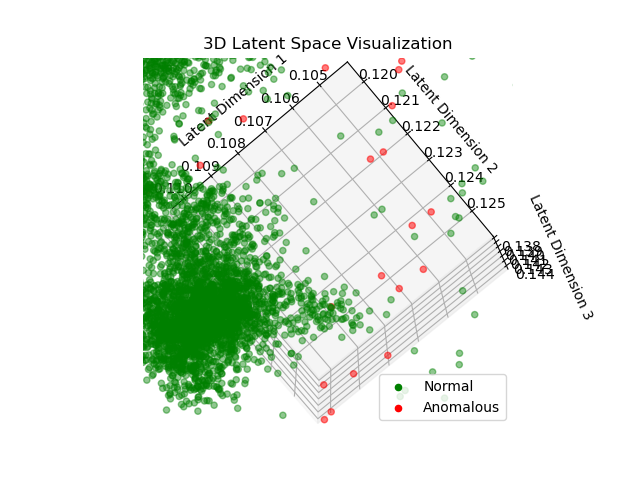

In [38]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for normal data
ax.scatter(latent_space[:, 0], latent_space[:, 1], latent_space[:, 2], c='green', label='Normal')

# Scatter plot for anomalous data
ax.scatter(latent_space_anomaly[:, 0], latent_space_anomaly[:, 1], latent_space_anomaly[:, 2], c='red', label='Anomalous')

ax.set_title('3D Latent Space Visualization')
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.legend()
plt.show()
